## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df=pd.merge(mouse_metadata, study_results, on='Mouse ID',how='outer')
# Display the data table for preview
comb_df


c:\Users\chun\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(len(comb_df['Mouse ID'].unique()))


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df=comb_df[comb_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mouselist=duplicated_df['Mouse ID'].unique()
dup_mouselist

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for mouse in dup_mouselist:
    clean_comb_df=comb_df.drop(comb_df[comb_df['Mouse ID']==mouse].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_comb_df['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
groupby_comb=clean_comb_df.groupby('Drug Regimen')
mean_list=groupby_comb['Tumour Volume (mm3)'].mean()
median_list=groupby_comb['Tumour Volume (mm3)'].median()
variance_list=groupby_comb['Tumour Volume (mm3)'].var()
std_list=groupby_comb['Tumour Volume (mm3)'].std()
sem_list=groupby_comb['Tumour Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary1_df=pd.DataFrame({'Mean':mean_list,'Median':median_list,'Variance':variance_list,'Stand Deviation':std_list,'SEM':sem_list})
summary1_df

,Mean,Median,Variance,Stand Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2_df=clean_comb_df.groupby('Drug Regimen').agg({'Tumour Volume (mm3)':['mean','median','var','std','sem']})
summary2_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

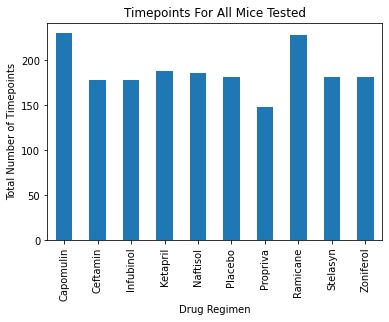

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
groupby_comb=clean_comb_df.groupby('Drug Regimen')
count_timepoints=groupby_comb['Drug Regimen'].count()
count_timepoints.plot.bar(title='Timepoints For All Mice Tested',xlabel='Drug Regimen',ylabel='Total Number of Timepoints')
plt.show()

C:\Users\chun\AppData\Local\Temp\ipykernel_3348\765591146.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  drug_list=groupby_comb['Drug Regimen'].unique().astype(str).str.replace(r'\[|\]|\'','')


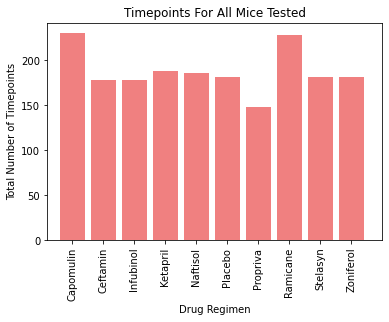

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis = np.arange(len(groupby_comb))
import numpy as np
drug_list=groupby_comb['Drug Regimen'].unique().astype(str).str.replace(r'\[|\]|\'','')
count_timepoints=groupby_comb['Drug Regimen'].count()

x_axis=np.arange(len(drug_list))
tick_locations=[value+0 for value in x_axis]

plt.xlim(-0.8,len(drug_list))
plt.xticks(tick_locations,labels=drug_list,rotation=90)
plt.bar(x_axis, count_timepoints,color='lightcoral')

plt.title('Timepoints For All Mice Tested')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

plt.show() 

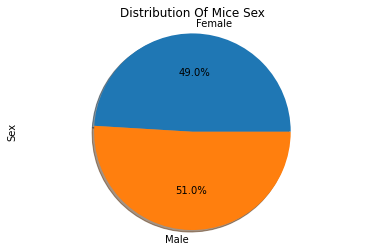

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_sex=clean_comb_df.groupby('Sex')
count_sex=groupby_sex['Sex'].count()
count_sex.plot.pie(title='Distribution Of Mice Sex',shadow=True, autopct='%1.1f%%')
plt.axis("equal")
plt.show()
plt.tight_layout()

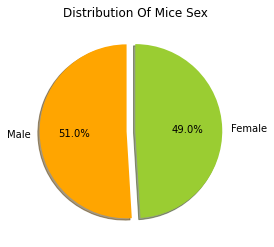

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_male=clean_comb_df['Mouse ID'].loc[clean_comb_df['Sex']=='Male'].count()
count_female=clean_comb_df['Mouse ID'].loc[clean_comb_df['Sex']=='Female'].count()
sex_count=[count_male,count_female]
sex=['Male','Female']

colours = ["orange","yellowgreen"]
explode = (0.1,0)

plt.pie(sex_count,explode=explode,colors=colours,shadow=True,labels=sex,autopct="%1.1f%%",startangle=90)
plt.title('Distribution Of Mice Sex')
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_mice=clean_comb_df.groupby('Mouse ID')
max_timepoint_list=groupby_mice['Timepoint'].max()
max_timepoint_list

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merge_df=pd.merge(max_timepoint_list,clean_comb_df,on=['Mouse ID','Timepoint'],how='left')
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
#tumour_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treament in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumour volumes
    #print(treament)
    tumour_vol=merge_df['Tumour Volume (mm3)'].loc[merge_df['Drug Regimen'] == treament]
    # add subset
    quartiles = tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #tumour_vol_list.append(tumour_vol)

    print(f"The lower quartile of tumour vol by {treament} is: {lowerq}")
    print(f"The upper quartile of tumour vol by {treament} is {upperq}")
    print(f"The interquartile range of tumour vol by {treament} is: {iqr}")
    print(f"The the median of tumour vol by {treament} is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values of {treament} below {lower_bound} could be outliers.")
    print(f"Values of {treament} above {upper_bound} could be outliers.")

    outliers=[x for x in tumour_vol if x < lower_bound]
    if len(outliers) != 0 :
        print(f'Outliers tumour volume by {treament} is: {list(outliers)}')
    print()
    

The lower quartile of tumour vol by Capomulin is: 32.37735684
The upper quartile of tumour vol by Capomulin is 40.1592203
The interquartile range of tumour vol by Capomulin is: 7.781863460000004
The the median of tumour vol by Capomulin is: 38.1251644 
Values of Capomulin below 20.70456164999999 could be outliers.
Values of Capomulin above 51.83201549 could be outliers.

The lower quartile of tumour vol by Ramicane is: 31.56046955
The upper quartile of tumour vol by Ramicane is 40.65900627
The interquartile range of tumour vol by Ramicane is: 9.098536719999998
The the median of tumour vol by Ramicane is: 36.56165229 
Values of Ramicane below 17.912664470000003 could be outliers.
Values of Ramicane above 54.30681135 could be outliers.

The lower quartile of tumour vol by Infubinol is: 54.04860769
The upper quartile of tumour vol by Infubinol is 65.52574285
The interquartile range of tumour vol by Infubinol is: 11.477135160000003
The the median of tumour vol by Infubinol is: 60.16518046 

In [92]:

    list(tumour_vol)








[38.98287774,
 38.93963263,
 30.48598484,
 37.07402422,
 40.1592203,
 47.68596303,
 37.31184577,
 38.1251644,
 38.75326548,
 41.48300765,
 38.84687569,
 28.43096411,
 33.32909778,
 46.53920617,
 32.37735684,
 41.58152074,
 23.34359787,
 40.72857787,
 34.45529799,
 31.02392294,
 40.65812366,
 39.95234669,
 36.04104736,
 28.48403281,
 31.8962384]

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°C)')
ax1.boxplot(temperatures)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
